<img src='https://www.rc.colorado.edu/sites/all/themes/research/logo.png'>

# Introduction to Data Visualization with `matplotlib`

Thomas Hauser

<img src='https://s3.amazonaws.com/research_computing_tutorials/mpl-overview.png'>

# Objectives

- Understand the different between `pylab` and `pyplot`.
- Understand the basic components of a plot.
- Understand style
- Give you enough information to use the [gallery](http://matplotlib.org/gallery#).
- Reference for several standard plots.
    - histogram, density, boxplot (when appropriate)
    - scatter, line, hexbin
    - contour, false-color


# References

This tutorial based on some of the following excellent content.

- [J.R. Johansson's tutorial](http://nbviewer.ipython.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb)
- [Matplotlib tutorial by Jake Vanderplas](http://jakevdp.github.io/mpl_tutorial/)
- [Nicolas P. Rougier's tutorial](http://www.loria.fr/~rougier/teaching/matplotlib/)
- [Painless create beautiful matplotlib](http://blog.olgabotvinnik.com/post/58941062205/prettyplotlib-painlessly-create-beautiful-matplotlib)
- [Making matplotlib look like ggplot](http://messymind.net/2012/07/making-matplotlib-look-like-ggplot/)
- https://github.com/jakevdp/mpld3
-  [Harvard CS109 Data Science Class](http://nbviewer.ipython.org/github/cs109/content/blob/master/lec_03_statistical_graphs.ipynb).

# Alternatives

- [ggplot](http://blog.yhathq.com/posts/ggplot-for-python.html) for python.
- [vincent](http://vincent.readthedocs.org/en/latest/quickstart.html#bar): Python to Vega (and ultimately d3).
- [bokeh](http://bokeh.pydata.org/)
- [mpld3](http://mpld3.github.io/): Render `matplotlib` as `d3.js` in the notebook.

# Object and Functional Models

**Functional**

- Emulate `Matlab`
- Convension: *implicit state*

        from pylab import *

**Object-oriented**

- Not a flat model.
- `Figure`, `Axes`

        import matplotlib.pyplot as plt


Caution: redundant interface, namespace issues


# Enabling plotting

**IPython terminal**

    ipython --pylab
    ipython --matplotlib
    
**IPython notebook**
    
    %pylab inline
    %matplotlib inline
    
    ipython notebook --pylab=inline
    ipython notebook --matplotlib=inline
    
    



# The funtional `pylab` interface

- Loads all of `numpy` and `matplotlib` into the global namesapce.
- Great for interactive use.

In [1]:
#inline to use with notebook (from pylab import *) 
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [6]:
# make the plots smaller
rcParams['figure.figsize'] = 10, 6

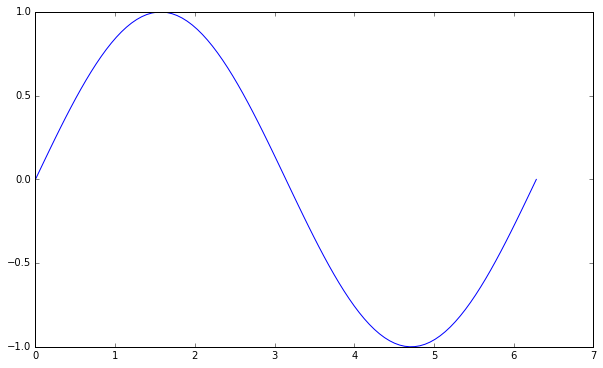

In [7]:
x = linspace(0, 2*pi, 100)
y = sin(x)
plot(x, y)
show()

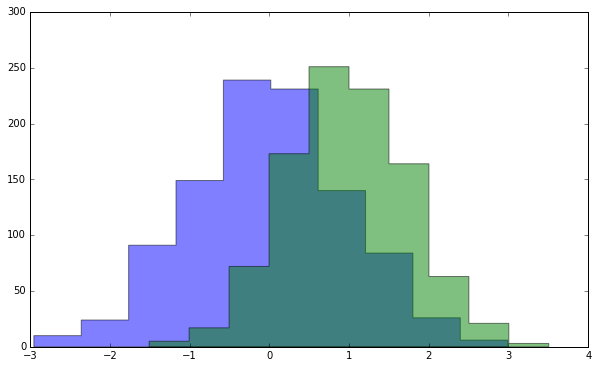

In [8]:
hist(randn(1000), alpha=0.5, histtype='stepfilled')
hist(0.75*randn(1000)+1, alpha=0.5, histtype='stepfilled') #hist?
show()

In [9]:
#hist?

Quick, easy, simple plots.

## Object-oriented `pyplot` interface

- No global variables
- Separates style from graph
- Can easily have multiple subplots

In [10]:
#restart notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [11]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = 8, 4

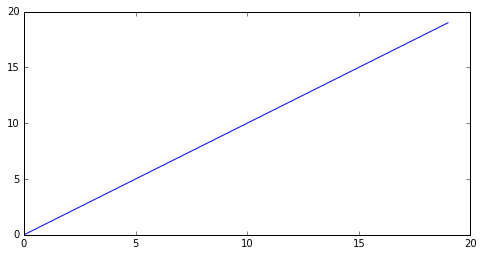

In [12]:
plt.plot(range(20))

### The `figures` and `axes` objects

First, we create a blank figure.  Then we add a subpot.

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


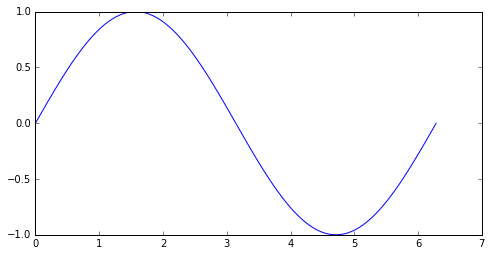

In [13]:
x = np.linspace(0, 2*np.pi, 100) #same as before
y = np.sin(x)

fig = plt.figure()
ax = fig.add_subplot(1,1,1) # 1 row, 1 col, graphic 1
ax.plot(x, y)
fig.show()

### Multiple subplots

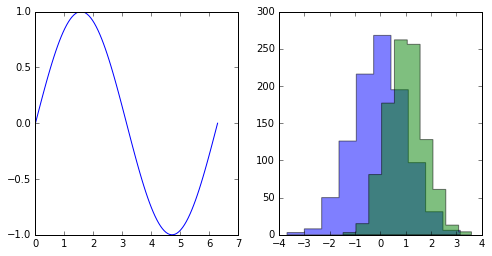

In [14]:
fig = plt.figure()

ax1 = fig.add_subplot(1,2,1) # 1 row, 2 cols, graphic 1
ax2 = fig.add_subplot(1,2,2) # graphic 2

ax1.plot(x, y)

ax2.hist(np.random.randn(1000), alpha=0.5, histtype='stepfilled')
ax2.hist(0.75*np.random.randn(1000)+1, alpha=0.5, histtype='stepfilled')

fig.show()

### The `plt.subplots()` command

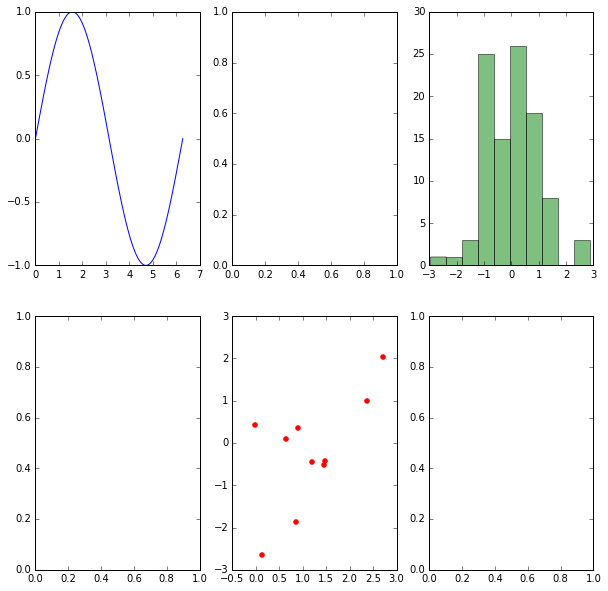

In [15]:
fig, ax = plt.subplots(2,3, figsize=(10,10))

ax[0,0].plot(x, y)
ax[0,2].hist(np.random.randn(100), alpha=0.5, color="g")
ax[1,1].scatter(np.random.randn(10), np.random.randn(10), color="r")

fig.show()

plt.plot?

    ==========  ========
    character   color
    ==========  ========
    'b'         blue
    'g'         green
    'r'         red
    'c'         cyan
    'm'         magenta
    'y'         yellow
    'k'         black
    'w'         white
    ==========  ========


## The `subplot2grid` command

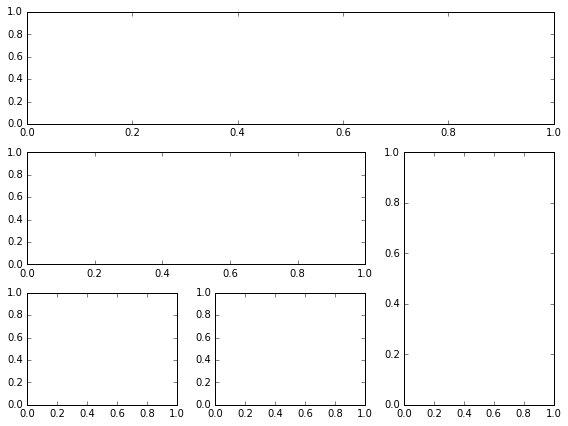

In [16]:
fig = plt.figure(figsize=(8,6))
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1,2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2,0))
ax5 = plt.subplot2grid((3,3), (2,1))
fig.tight_layout()
fig.show()

### Sharing axis values

(3,)


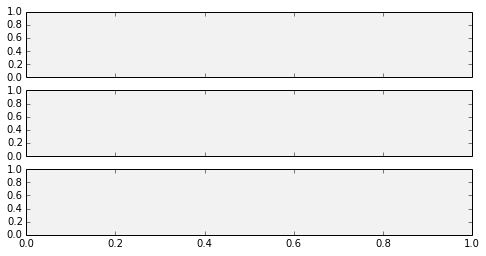

In [12]:
fig, axes = plt.subplots( 3, 1, sharex = True)
for ax in axes:
    ax.set_axis_bgcolor('0.95')
fig.show()
print axes.shape

(2, 2)


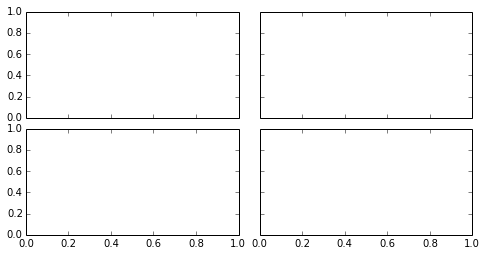

In [13]:
fig, axes = plt.subplots( 2, 2, sharex = True, sharey = True)
plt.subplots_adjust( wspace = 0.1, hspace = 0.1)
fig.show()
print axes.shape

### How about a little `d3.js` with `mpld3`?

https://github.com/jakevdp/mpld3

In [18]:
from mpld3 import enable_notebook
enable_notebook()

(2,)


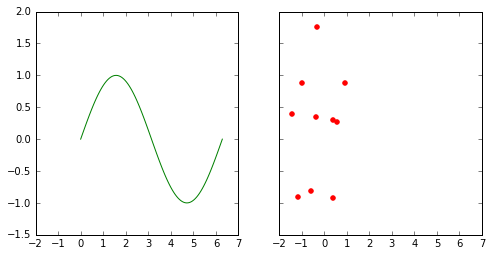

In [19]:
fig, ax = plt.subplots(1,2, sharey=True, sharex=True)

print ax.shape

ax[0].plot(x, y, color='green')
ax[1].scatter(np.random.randn(10), np.random.randn(10), color='red')

fig.show()